##**What is Decision Tree**
It is a tree based model that makes decision based on inputs (questions asked)
* DecisionTreeRegressor -> For regression problem
* DecisionTreeClassifier -> For classification problem

###**Components of Decision Tree**
1. Root node: The very first question that you ask, top of the tree. (impurest)
2. Decision nodes: A point where the another question is asked
    * These are in between the root node and end result
3. Leaf node(Terminal Node): Final answer or decision we get
4. Branches(edges): These are the arrows from one node to another

###**Ways to make decision**
1. **Gini Impurity**:
    * It measures how mixed a group is
    * A pure group = all same class = gini value will be 0
    * lower gini = Better split

2. **Entropy**
    * Entropy = The level of disorder in our data
    * The goal is to reduce the randomness from the data
    * lower entropy = less randomness
3. **Information Gain**
    * Info Gain = How much order we gain after a split
    * the more info gain means splits towards more pure data

##**Random Forest**
It is like a group of decision trees that work together to make better predictions. instead of building one DT, it builds many trees and takes vote or average to make the final decision
* It follows the concept of ensemble learning (combining the prediction of multiple models to get better result)
* It follows bootstrap aggregation (Bagging) where we select random data from the dataset abd then train each decision trees one by one

###**For evaluation**
once all the trees are built
* For classification: Each trees votes for a class, the majority wins
* For Regression: The output is the average of all the tree predictions

##**Underfitting and Overfitting**
* **UnderFitting**: When the models performance poor on both training and Testing data
    * To reduce the underfitting: l1/l2 Regularization (or increase the amount training data)
* **Overfitting**: When model performs good on training data but failed to perform a good on new data.
    * To overcome overfitting: reduce the tree depth, L1 and L2, use Cross Validations, increase the testing data, use ensemble techniques

**Dataset Link:** https://drive.google.com/file/d/1haLnnbt5nWY_qXjg7oJbO3ztrDaToylO/view?usp=sharing

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/customer_churn (1).csv')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Insights**
* Almost all columns are of object datatype
* There are some columns that seems to look like Numeric column but actually they are object

In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
# df['TotalCharges'].astype(float)

In total charges column there are some white spaces `' '`

Thats why we are getting

`ValueError: could not convert string to float: ' '`


In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
# errors = 'coerce' -> it converts the errors into null

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

(7032, 21)

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.drop(columns=['customerID'],inplace=True)

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


###**Data preprocessing**
We will now encode the data

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
for col in df.columns:
  if df[col].dtype =='object':
    df[col] = le.fit_transform(df[col])
    mapping = dict(zip(le.classes_,le.transform(le.classes_)))
    print(f'Column: {col}')
    print(f'Original---> Encoded')
    for orig, enc in mapping.items():
      print(f'{orig} --> {enc}')
    print()

Column: gender
Original---> Encoded
Female --> 0
Male --> 1

Column: Partner
Original---> Encoded
No --> 0
Yes --> 1

Column: Dependents
Original---> Encoded
No --> 0
Yes --> 1

Column: PhoneService
Original---> Encoded
No --> 0
Yes --> 1

Column: MultipleLines
Original---> Encoded
No --> 0
No phone service --> 1
Yes --> 2

Column: InternetService
Original---> Encoded
DSL --> 0
Fiber optic --> 1
No --> 2

Column: OnlineSecurity
Original---> Encoded
No --> 0
No internet service --> 1
Yes --> 2

Column: OnlineBackup
Original---> Encoded
No --> 0
No internet service --> 1
Yes --> 2

Column: DeviceProtection
Original---> Encoded
No --> 0
No internet service --> 1
Yes --> 2

Column: TechSupport
Original---> Encoded
No --> 0
No internet service --> 1
Yes --> 2

Column: StreamingTV
Original---> Encoded
No --> 0
No internet service --> 1
Yes --> 2

Column: StreamingMovies
Original---> Encoded
No --> 0
No internet service --> 1
Yes --> 2

Column: Contract
Original---> Encoded
Month-to-month -->

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   int64  
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   int64  
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   int64  
 17  

###**Analysis**

In [ ]:
df.Churn.value_counts(normalize =True)* 100

,proportion
Churn,
0,73.421502
1,26.578498


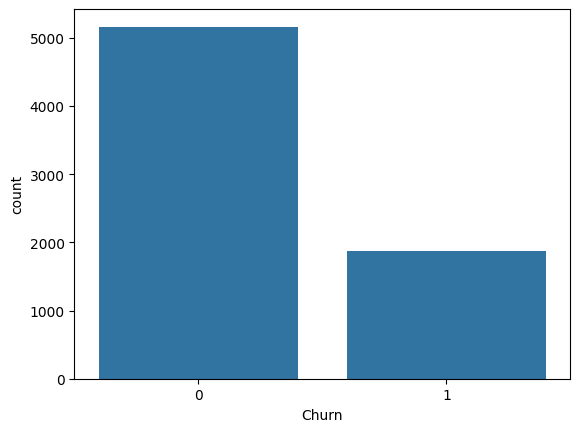

In [ ]:
sns.countplot(data=df, x = 'Churn')
plt.show()

In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<Axes: xlabel='tenure', ylabel='Count'>

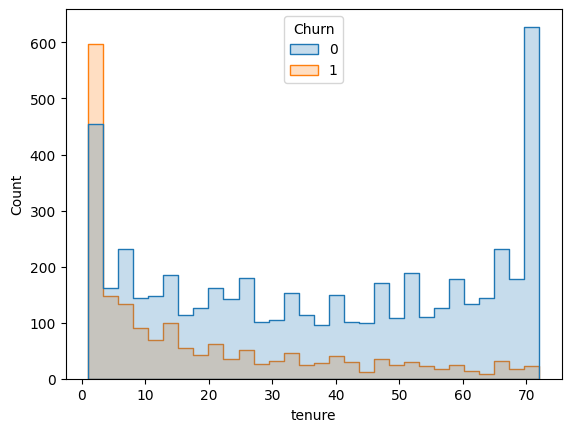

In [ ]:
sns.histplot(data=df,x='tenure',hue='Churn',element='step',bins=30)

**Analysis**
* Most churn hapoens early - customer in their first few month are more likely to leave
* Long-Time customers rarely churns - Loyality increase with tenure

**Graph of Monthly charges vs churn**

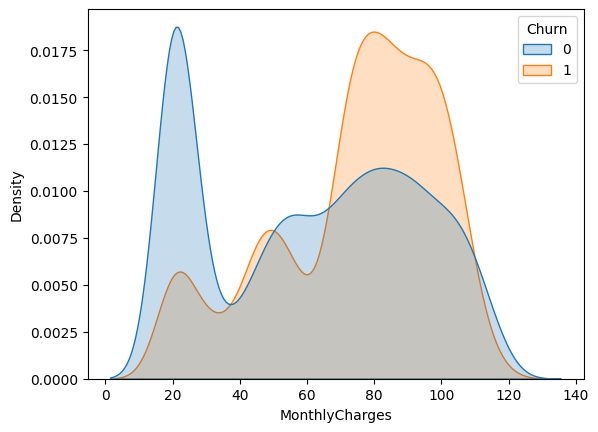

In [ ]:
sns.kdeplot(data=df,x='MonthlyCharges',hue='Churn',common_norm=False, fill= True)
plt.show()

**High monthly bills are related to churn**

Original---> Encoded

DSL --> 0

Fiber optic --> 1

No --> 2

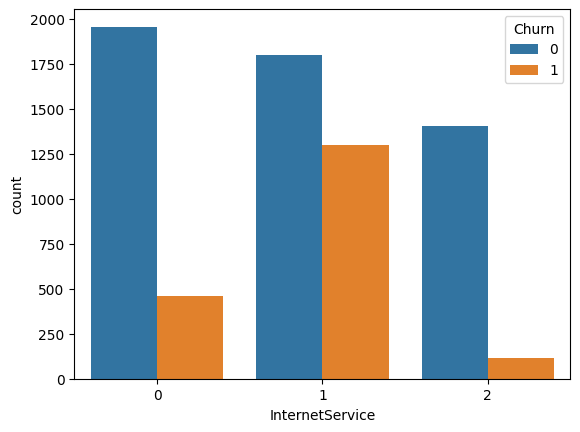

In [ ]:
sns.countplot(data=df, x = 'InternetService', hue='Churn')
plt.show()

**Most of the people who chose fiber optics are churning, need to check the service**

**Let's split the data for model building**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = df.drop(['Churn'],axis = 1)
y = df['Churn']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [ ]:
x_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3946,0,0,0,0,9,0,1,0,2,0,2,2,2,2,0,0,3,58.50,539.85
3394,1,0,0,0,26,1,2,0,2,2,0,0,0,0,1,0,2,61.55,1581.95
1635,0,0,0,0,3,1,0,0,0,0,2,0,2,2,1,1,2,69.95,220.45
4088,1,0,0,0,7,1,2,1,0,0,0,0,0,0,0,0,2,73.60,520.00
1886,1,0,1,1,67,1,0,0,2,0,2,2,0,0,2,1,0,60.40,3953.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,1,0,0,0,3,1,2,0,0,0,0,0,0,0,0,0,0,50.40,137.25
5199,0,0,0,0,51,1,2,1,0,2,2,2,2,2,1,1,2,111.50,5703.25
5235,1,0,0,0,9,1,2,1,2,0,0,0,0,0,0,1,2,81.15,784.45
5399,0,0,0,0,50,1,0,2,1,1,1,1,1,1,1,0,0,19.75,989.05


In [ ]:
x_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2481,1,1,1,0,61,1,2,2,1,1,1,1,1,1,2,0,0,25.00,1501.75
6784,0,0,0,0,19,1,2,2,1,1,1,1,1,1,0,0,0,24.70,465.85
6125,1,0,1,0,13,1,2,1,0,0,2,0,2,2,0,1,1,102.25,1359.00
3052,1,0,1,0,37,1,2,0,2,0,0,0,0,0,0,1,3,55.05,2030.75
4099,0,0,0,0,6,0,1,0,2,0,0,0,0,0,0,0,0,29.45,161.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,1,0,1,1,64,1,0,1,2,2,0,0,0,0,0,0,2,81.05,5135.35
6747,0,0,1,0,52,0,1,0,2,0,2,0,0,0,1,0,3,35.45,1958.95
1700,1,0,0,0,47,1,0,2,1,1,1,1,1,1,2,0,0,20.45,943.00
1099,1,0,1,1,5,1,2,0,0,0,0,2,0,0,0,1,3,55.70,259.40


**Build model**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_model = LogisticRegression()

In [ ]:
log_model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred = log_model.predict(x_test)

In [ ]:
y_pred

array([0, 0, 1, ..., 0, 0, 0])

**evaluate the model**

In [ ]:
from sklearn.metrics import *

In [ ]:
accuracy_score(y_pred, y_test)

0.7928909952606635

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1614
           1       0.55      0.62      0.59       496

    accuracy                           0.79      2110
   macro avg       0.72      0.73      0.72      2110
weighted avg       0.80      0.79      0.80      2110



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Decision tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = dt_model.predict(x_test)

In [ ]:
accuracy_score(y_pred,y_test)

0.7127962085308057

In [ ]:
# Random forest
rf_model = RandomForestClassifier(random_state=42, n_estimators= 200)
rf_model.fit(x_train,y_train)
y_pred = rf_model.predict(x_test)

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1665
           1       0.49      0.62      0.54       445

    accuracy                           0.78      2110
   macro avg       0.69      0.72      0.70      2110
weighted avg       0.80      0.78      0.79      2110



**Hyper parameter tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# setup the params
paramGird = {
    'n_estimators' : [100,200,300],
    'max_depth' : [None,10,20,30],
    'min_samples_split': [2,5,10],
    'min_samples_leaf' : [1,2,4],
    'bootstrap' : [True,False]
}

In [ ]:
rf = RandomForestClassifier(random_state=42)
grid_Search = GridSearchCV(
    estimator=rf,
    param_grid= paramGird,
    cv = 5, # splits the training data into 5 parts and test 5 times
    n_jobs = -1,# Compute faster (use availabe gpus)
    verbose = 2, # 0 = Silent,1 = minimul,2 = Detailed
    scoring = 'accuracy'
)

In [ ]:
grid_Search.fit(x_train,y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [ ]:
y_pred = grid_Search.predict(x_test)
accuracy_score(y_pred,y_test)

0.8

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87      1685
           1       0.50      0.66      0.57       425

    accuracy                           0.80      2110
   macro avg       0.71      0.75      0.72      2110
weighted avg       0.83      0.80      0.81      2110




 **Business Insights & Recommendations:**

1. Customer Retention Strategy:
   - The model identifies high-risk customers likely to churn.
   - Focus retention efforts (discounts, personalized offers, or improved support) on these customers.

2. Feature Importance Analysis:
   - Based on Random Forest feature importance, top factors influencing churn are:
     • Tenure (short-term customers are more likely to leave)
     • Monthly Charges (higher charges increase churn probability)
     • Contract Type (month-to-month contracts show higher churn)
   - Business can reduce churn by encouraging customers to move to longer-term plans or offering flexible billing.

3. Customer Feedback Loop:
   - Gather additional data (surveys, complaints) for customers predicted as "likely to churn" to identify hidden issues.
   - Feed this feedback back into the data pipeline to continuously improve model accuracy.

4. Continuous Model Monitoring:
   - Retrain and evaluate the model every 3–6 months with new customer data.
   - Add real-time prediction capability (e.g., via dashboard or CRM integration).

**Expected Impact:**
   - By acting on model predictions, the company could potentially reduce churn rate by 10–15%.
   - This directly increases customer lifetime value (CLV) and revenue stability.

